<a href="https://colab.research.google.com/github/celinecresswell/learning_ML_datasci/blob/main/outlierdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection Guide + Information
Following information from:
https://www.freecodecamp.org/news/how-to-detect-outliers-in-machine-learning/


- When the data follows a normal distribution: Use standard deviation
    - Set the lower limit to mu - 3*sigma
    - Set the upper limit to mu + 3*sigma
    - (sigma is the standard deviation)
  

In [1]:
#import neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
#generate the dataset
def generate_scores(mean=60,std_dev=12,num_samples=200):
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores
scores_data = generate_scores()

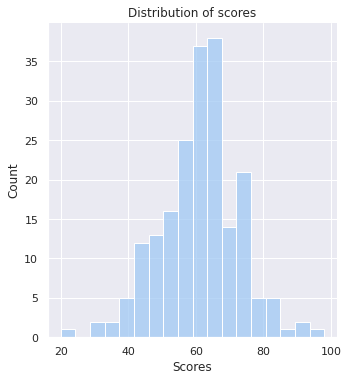

In [7]:
sns.set_theme(palette = 'pastel', font = 'Times New Roman')
sns.displot(data = scores_data).set(title = 'Distribution of scores', xlabel = 'Scores')
#You do not need to set the ylabel here because we are looking at the distribution of 
# the one column(feature)

In [6]:
#Load the data into a panda dataframe
df = pd.DataFrame(scores_data, columns = ['score'])
#Only looking at one column, we use columns = [''] to just load the one column into the df


In [10]:
df_mean = df.mean()
df_std = df.std()
print('This is the mean of the score data: ' + str(df_mean) + ', whilst this is the standard deviation: ' + str(df_std))

This is the mean of the score data: score    61.005
dtype: float64, whilst this is the standard deviation: score    11.854434
dtype: float64


In [29]:
#Work out the upper and lower limits
upper_limit = df['score'].mean() + (3*df.std())
lower_limit = df['score'].mean() - (3*df.std())

print('This is the upper limit: ' + str(upper_limit))
print('This is the lower limit: ' + str(lower_limit))

This is the upper limit: score    96.568303
dtype: float64
This is the lower limit: score    25.441697
dtype: float64


In [35]:
print(lower_limit['score'])


25.441697037705573


In [37]:
df_filtered = df[(df['score']<upper_limit['score'])&(df['score']>lower_limit['score'])]

An error was originally encountered in the code above: ValueError: Can only compare identically-labeled Series objects

The code originally said, within the brackets df['score'] <upper_limit 

This did not work as the format which upper limit is printed in was not matching the format that we were comparing the series from the dataframe in. We needed to select the particular series from the upper_limit dataframe to be able to compare it.

If the data is normally distributed you can also use the z-score.

If the data is not normally distributed, use the interquartile range or percentage methods to detect outliers.